# DAT210x - Programming with Python for DS

## Module6- Lab1

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [2]:
C = 1
kernel = 'linear'

In [3]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [20]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.iloc[:, [row,col]]
            X_test_bag = X_test.iloc[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.iloc[:, 0].min() - padding, X_train_bag.iloc[:, 0].max() + padding
            y_min, y_max = X_train_bag.iloc[:, 1].min() - padding, X_train_bag.iloc[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.iloc[:, 0], X_train_bag.iloc[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        a = model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = a.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [6]:
X = pd.read_csv('Datasets/wheat.data', index_col = 0)
print(X.head())


     area  perimeter  compactness  length  width  asymmetry  groove wheat_type
id                                                                            
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220       kama
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956       kama
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825       kama
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805       kama
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175       kama


In [7]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [8]:
X.dropna(axis = 0, how = 'any', inplace = True)

In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [9]:
y = X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
print(X.head(6))
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

     area  perimeter  compactness  length  width  asymmetry  groove
id                                                                 
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175
5   14.38      14.21       0.8951   5.386  3.312      2.462   4.956


Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [11]:
import sklearn

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

#
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
#
# .. your code here ..


Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [13]:
from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Fire it Up:

KNeighbors Results
5000 Iterations Training Time:  2.4285707473754883
5000 Iterations Scoring Time:  8.276288032531738
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


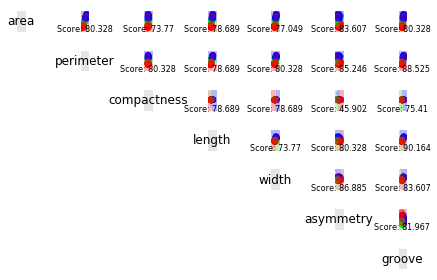

In [22]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

In [19]:
X_train

,area,perimeter,compactness,length,width,asymmetry,groove
id,,,,,,,
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263
38,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
194,12.11,13.27,0.8639,5.236,2.975,4.132,5.012
...,...,...,...,...,...,...,...
155,11.19,13.05,0.8253,5.250,2.675,5.813,5.219
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825


SVC Results
5000 Iterations Training Time:  3.692995548248291
5000 Iterations Scoring Time:  2.2658073902130127
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


C:\Users\IsraelBeyene\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


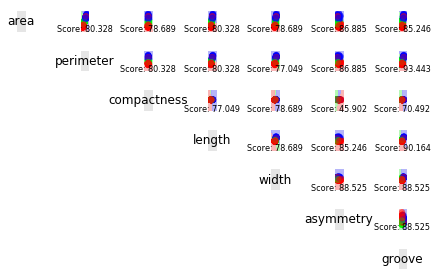

In [23]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

In [24]:
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.